In [1]:
import csv
import os
import pandas as pd

In [2]:
script_dir = os.getcwd()
children_dir = os.path.join(script_dir, 'children_data')
'''
32022R2065= DSA # 41 children 
32024R1689= AI ACT
32022R1925 DMA
'''
dest_celex = "32022R2065" #'32022R1925' 
dest_dir = os.path.join(children_dir, dest_celex)
df = pd.DataFrame()
sum=0
for csv in os.listdir(dest_dir):
    if csv.endswith('.csv'):
        csv_path = os.path.join(dest_dir, csv)
        new_df = pd.read_csv(csv_path)
        sum += len(new_df)
        df = pd.concat([df, new_df], ignore_index=True)
print(len(df), sum)

599 599


In [3]:
df.head()

,title,parent_celex,oj_num,doc_type,celex_num,url
0,Opinion of the European Economic and Social Co...,32019R1150,"C 440/177, 6.12.2018",C,52018AE2619,https://eur-lex.europa.eu/legal-content/EN/AUT...
1,Regulation (EU) No 1215/2012 of the European P...,32019R1150,"OJ L 351, 20.12.2012, p. 1-32",L,32012R1215,https://eur-lex.europa.eu/legal-content/EN/AUT...
2,Regulation (EC) No 593/2008 of the European Pa...,32019R1150,"OJ L 177, 4.7.2008, p. 6-16",L,32008R0593,https://eur-lex.europa.eu/legal-content/EN/AUT...
3,Directive (EU) 2016/943 of the European Parlia...,32019R1150,"OJ L 157, 15.6.2016, p. 1-18",L,32016L0943,https://eur-lex.europa.eu/legal-content/EN/AUT...
4,Regulation (EU) 2016/679 of the European Parli...,32019R1150,"OJ L 119, 4.5.2016, p. 1-88",L,32016R0679,https://eur-lex.europa.eu/legal-content/EN/AUT...


In [4]:
# count number of rows that has doc_type==C and doc_type==L
df['doc_type'].value_counts()

doc_type
L    526
C     73
Name: count, dtype: int64

<Axes: title={'center': 'Number of rows for each parent celex'}, xlabel='parent_celex'>

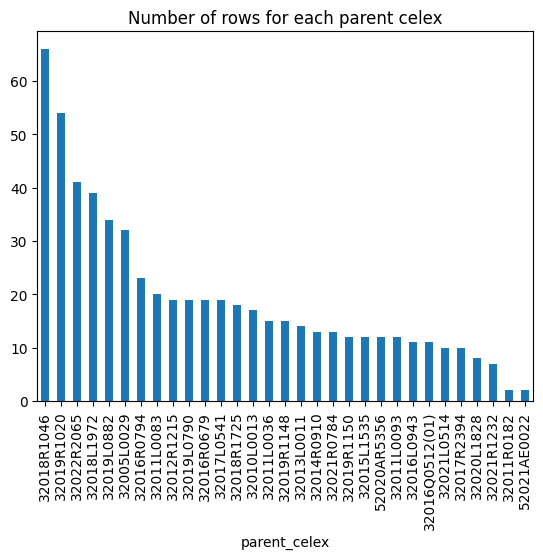

In [5]:
# count number of rows for each parent_celex
df['parent_celex'].value_counts()

# plot number of rows for each parent celex with title
df['parent_celex'].value_counts().plot(kind='bar', title='Number of rows for each parent celex')


In [ ]:
from IPython.display import display, HTML

# add a new column with modified title
def shorten_title(title):
    # print(title)
    title = title.replace("European Parliament and of the Council", "EPC")
    title = title.split(" on ")[0]
    title = title.split(" concerning ")[0]
    title = title.split(" regarding ")[0]
    title = title.split(" setting ")[0]
    title = title.split(" establishing ")[0]
    title = title.split(" laying ")[0]
    title = title.split(" relating ")[0]
    title = title.split(" setting ")[0]
    title = title.split(" setting ")[0]

    # replace every month names into numbers
    months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    # replace the month name into number if it is in the title
    for i, month in enumerate(months):
        if month in title:
            title = title.replace(' '+ month + ' ', '-' + str(i+1)+ '-')
    return title
df['short_title'] = df['title'].apply(shorten_title)
pd.set_option('display.max_colwidth', None)

# Display the short_title column as a scrollable table
display(HTML(df[['short_title']].to_html(max_rows=None, max_cols=None, notebook=True)))

,short_title
0,Opinion of the European Economic and Social Committee
1,Regulation (EU) No 1215/2012 of the EPC of 12-12-2012
2,Regulation (EC) No 593/2008 of the EPC of 17-6-2008
3,Directive (EU) 2016/943 of the EPC of 8-6-2016
4,Regulation (EU) 2016/679 of the EPC of 27-4-2016
5,Directive (EU) 2016/680 of the EPC of 27-4-2016
6,Directive 2002/58/EC of the EPC of 12-7-2002
7,Commission Recommendation of 6-5-2003
8,Directive 2008/52/EC of the EPC of 21-5-2008
9,CONVENTION ON THE RIGHTS OF PERSONS WITH DISABILITIES
